In [7]:
# install the newest development version of twi-xl-python.
!pip install git+https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git@73039c837dcce371c8ba4d25f1f7533f9763c954 --force-reinstall

  Cloning https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git (to revision 73039c837dcce371c8ba4d25f1f7533f9763c954) to /private/tmp/pip-req-build-79mli8yj
  Running command git clone -q https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git /private/tmp/pip-req-build-79mli8yj
  Running command git rev-parse -q --verify 'sha^73039c837dcce371c8ba4d25f1f7533f9763c954'
  Running command git fetch -q https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git 73039c837dcce371c8ba4d25f1f7533f9763c954
  Running command git checkout -q 73039c837dcce371c8ba4d25f1f7533f9763c954
  Resolved https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git to commit 73039c837dcce371c8ba4d25f1f7533f9763c954
  distutils: /private/tmp/pip-build-env-ic0cx0xl/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/tmp/pip-build-env-ic0cx0xl/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/pri

     |████████████████████████████████| 151 kB 13.4 MB/s eta 0:00:01
  Created wheel for twi-xl-python: filename=twi_xl_python-1.0.0-py3-none-any.whl size=12517 sha256=ba271d2b6c4a6c8f456586738b00e5fc50d35ff3b8919da74a063fe251f375b0
  Stored in directory: /private/tmp/pip-ephem-wheel-cache-4t6tnhqn/wheels/57/55/26/885db34221264a036eb412f1ff577628cc04efd348eba371ea
Successfully built twi-xl-python
  Attempting uninstall: zipp
    Found existing installation: zipp 3.15.0
    Uninstalling zipp-3.15.0:
      Successfully uninstalled zipp-3.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.15
    Uninstalling urllib3-1.26.15:
      Successfully uninstalled urllib3-1.26.15
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23

In [2]:
!/opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip

In [21]:
from twixl.collections import twitter
from datetime import datetime
import twixl
import os
from sklearn.model_selection import train_test_split

In [13]:
# Set development twi-xl api endpoint.
os.environ["TWIXL_API_ENDPOINT"] = "https://ftmgjhmifb.execute-api.eu-central-1.amazonaws.com/politics"
os.environ["TWIXL_API_KEY"] = "Ad39ewyYoakVZsz2qd6a0dBoKFnmZCX7EkV1334IvSs0"

In [7]:
#Create list of author id's
with open("./MPs_twitter_usernames.txt", "r") as f:
    authors = f.read().splitlines()

In [331]:
authors[:4]

['sybrandbuma', 'swsjoerdsma', 'erikziengs', 'mvonmartels']

In [10]:
#Create a query to search tweets from listed authors.

# Only search politics dataset (i.e. dnpp Groningen archive and profile scraper)
query_authors_only_politics = (
    twitter.Query(
        dataset=twitter.dataset.POLITICS)
        .from_usernames(authors)
)
# Only search twinl dataset
query_authors_only_twinl = (
    twitter.Query(
        dataset=twitter.dataset.TWINL)
        .from_usernames(authors)
)
# Default is to search ALL archives (i.e. twinl and politics datasets)
query_authors = (
    twitter.Query()
        .from_usernames('sybrandbuma')
)

In [11]:
query_authors.print()

{
    "query": [
        {
            "AND": {
                "from_usernames": "['sybrandbuma' OR 'swsjoerdsma' OR 'erikziengs' OR 'mvonmartels' OR 'suzanne_GL' OR 'keklikyucel' OR 'HaykeVeldman' OR 'jesseklaver' OR 'HarmenKrul' OR 'edgarmulder1' OR 'SylvanaBIJ1' OR 'Loesypma' OR 'JHTerpstra' OR 'RPlasterk' OR 'Fonda_Sahla' OR 'Yvonne_Bijenhof' OR 'meilivos' OR 'jobaCDA' OR 'rikgrashoff' OR 'KeesVee' OR 'djeppink' OR 'FemkeMerel' OR 'amerkies' OR 'RienvdVelde' OR 'NicoleTemmink' OR 'WassilaHachchi' OR 'DonCeder' OR 'barbara_visser1' OR 'lilianhelderpvv' OR 'sharon_dijksma' OR 'RaoulBoucke' OR 'SvVeldhoven' OR 'ivanengelshoven' OR 'StienekevdGraaf' OR 'LisaGinneken' OR 'Jeanetvdlaan' OR 'sarahdobbe' OR 'Matthijshuizing' OR 'helmanepperus' OR 'dbonis' OR 'AgnesMulderCDA' OR 'martijngrevink' OR 'WBHoekstra' OR 'JacquesMonasch' OR 'yasemincegerek' OR 'leendertdelange' OR 'dijkhoff' OR 'svanweyenberg' OR 'Danai_PVV' OR 'PieterOmtzigt' OR 'kirstenvdhul' OR 'kathalijne' OR 'keesvdstaaij' O

In [ ]:
import datetime
import pandas as pd

# Define an empty DataFrame to store the results
final_df = pd.DataFrame()

# Loop over the list of author names
for author in authors:
    # Define the query for each author
    query_authors = (
        twitter.Query()
            .from_usernames([author])
    )
    
    # Search Twitter archive for each author
    search_results = twitter.search(
        query=query_authors,
        start_time=datetime.datetime(2014, 1, 1, 0, 0),
        end_time=datetime.datetime(2024, 3, 1, 0, 0),
        callback=twitter.print_callback
    )
    
    # Convert search results to a DataFrame
    df = search_results.to_pandas()
    
    # Add a column with the author's name
    df['Author'] = author
    
    # Append the DataFrame to the final DataFrame
    final_df = final_df.append(df, ignore_index=True)

In [30]:
final_df.to_csv('full_twitter_data.csv')

# Step 2: prepare data for annotation

## Read in data

In [376]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Set a random seed for reproducibility
np.random.seed(42)

final_df = pd.read_csv('full_twitter_data.csv')

In [377]:
#display first 10 rows
final_df.head(3)

,Unnamed: 0,tweet_id,timestamp,text,full_text,hashtags,urls,source,Author
0,0,1363121859546533899,2021-02-20 13:42:31,"Nee, dit is niet de Noordelijke IJszee, maar h...","Nee, dit is niet de Noordelijke IJszee, maar h...",[],[],dnpp,sybrandbuma
1,1,1359578121108881410,2021-02-10 18:00:58,Vanavond samen met @cdKfryslan en @WiebeWielin...,Vanavond samen met @cdKfryslan en @WiebeWielin...,[],['https://twitter.com/i/web/status/13595781211...,twinl,sybrandbuma
2,2,1365635915201335297,2021-02-27 11:12:29,RT @VRFryslan: De coronacrisis heeft grote imp...,NaN,[],[],twinl,sybrandbuma


<Axes: >

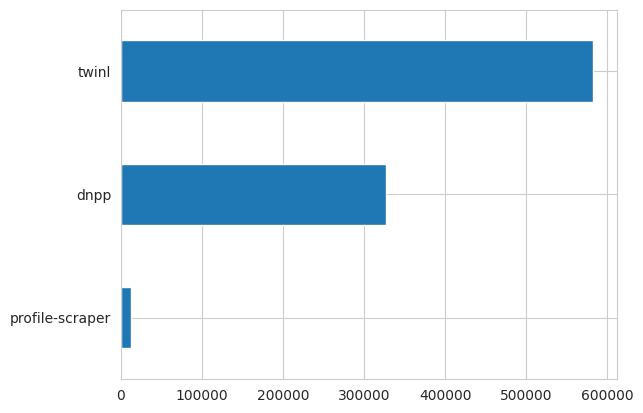

In [378]:
# Plot the number of tweets from different datasets.
final_df.source.value_counts().sort_values().plot(kind = 'barh')

In [379]:
# check&count duplicates between datasets
final_df['is_duplicated'] = final_df.duplicated(["tweet_id"])
final_df['is_duplicated'].sum()

264649

In [380]:
unique_df = final_df.drop_duplicates(subset=['tweet_id'])
unique_df = unique_df.drop_duplicates(subset=['text'])

In [381]:
len(unique_df)

611189

In [382]:
unique_df['twitter_username']  = unique_df['Author']

### Merge data with MP dataset from WikiData

In [383]:
mps = pd.read_csv('tweedekamerleden.csv')

In [384]:
# Some information about Party ended up in the 'Start Date' column. Fix this here: 
# Function to combine 'Start Date' and 'Party' columns
def combine_columns(row):
    if pd.isna(row['Party']):
        if pd.notna(row['Start Date']):
            return f"{row['Start Date']}"
        else:
            return row['Party']
    else:
        return row['Party']

# Apply the function to combine columns
mps['Political_Party'] = mps.apply(combine_columns, axis=1)

In [385]:
mps[['Start Date', 'Party', 'Political_Party']]
mps['Political_Party'].value_counts()

VVD                              223
PVV                               92
D66                               79
CDA                               66
PvdA                              63
SP                                51
GroenLinks-PvdA                   25
Nieuw Sociaal Contract            20
GroenLinks                        19
CU                                13
SGP                               13
PvdD                              13
ChristenUnie                      10
50PLUS                             9
PvdA[p]                            9
FVD                                9
DENK                               9
GL[p]                              8
Partij voor de Dieren              8
BBB                                8
GL                                 8
Volt                               5
FVD[z]                             3
Forum voor Democratie              3
Van Kooten-Arissen                 3
JA21                               3
JA21[ac]                           2
G

In [386]:
# Normalize party references. 
# Mapping dictionary for party names
party_mapping = {
    'GroenLinks': 'GroenLinks',
    'SP': 'SP',
    'CDA': 'CDA',
    'VVD': 'VVD',
    'D66': 'D66',
    'Forum voor Democratie': 'Forum voor Democratie',
    'PvdD': 'PvdD',
    'PVV': 'PVV',
    'BIJ1': 'BIJ1',
    'JA21[ac]': 'JA21',
    'GroenLinks-PvdA': 'GroenLinks-PvdA',
    'PvdA': 'PvdA',
    'CU': 'CU',
    'DENK': 'DENK',
    'Volt': 'Volt',
    'SGP': 'SGP',
    'Nieuw Sociaal Contract': 'Nieuw Sociaal Contract',
    'Partij voor de Dieren': 'Partij voor de Dieren',
    'ChristenUnie': 'ChristenUnie',
    'GL[p]': 'GroenLinks',
    'PvdA[p]': 'PvdA'
}

# Map party names
mps['normalized_party'] = mps['Political_Party'].map(party_mapping)
mps['normalized_party'].value_counts()

VVD                       223
PVV                        92
D66                        79
PvdA                       72
CDA                        66
SP                         51
GroenLinks                 27
GroenLinks-PvdA            25
Nieuw Sociaal Contract     20
CU                         13
PvdD                       13
SGP                        13
ChristenUnie               10
DENK                        9
Partij voor de Dieren       8
Volt                        5
Forum voor Democratie       3
JA21                        2
BIJ1                        1
Name: normalized_party, dtype: int64

In [ ]:
## Conduct the merge with the non-duplicated twitter data and the MP dataset from wikidata

In [387]:
df = pd.merge(unique_df, mps, on=['twitter_username'], how='left')

In [388]:
unique_df = df.drop_duplicates(subset=['tweet_id'])
df = unique_df.drop_duplicates(subset=['text'])

## remove RT's
df = df[~df['text'].str.startswith("RT @")]
len(df)

406306

In [ ]:
## Fix missing party members

In [389]:
# Mapping dictionary for party names
party_mapping = {
    'BramvanOjikGL': 'GroenLinks',
    'CorinneEllemeet': 'GroenLinks',
    'GroenLiesbeth': 'GroenLinks',
    'HenkKrol': '50PLUS',
    'JacquesMonasch': 'PvdA',
    'JoramvKlaveren': 'DENK',
    'jesseklaver': 'GroenLinks',
    'lindavoortman': 'GroenLinks',
    'rikgrashoff': 'GroenLinks',
    'tunahankuzu': 'DENK'
}

# Map party names only if normalized_party is NaN
df.loc[df['normalized_party'].isna(), 'normalized_party'] = df.loc[df['normalized_party'].isna(), 'Author'].map(party_mapping)

In [390]:
df['normalized_party'].value_counts()

GroenLinks                79694
VVD                       62397
SP                        57166
CDA                       49305
D66                       33746
PvdA                      32234
PVV                       19082
CU                        14080
BIJ1                      11972
PvdD                      11038
Forum voor Democratie      7783
GroenLinks-PvdA            6556
DENK                       3611
50PLUS                     3553
SGP                        3046
JA21                       3022
Nieuw Sociaal Contract     2633
Volt                       2358
ChristenUnie               1608
Partij voor de Dieren      1422
Name: normalized_party, dtype: int64

In [ ]:
### create Ideology mappings left -- right

In [391]:
# Dictionary to map parties to left/right scale values
party_ideology = {
    'GroenLinks': -3,   # Strongly left
    'SP': -2,            # Left
    'CDA': 0,            # Center
    'VVD': 3,            # Right
    'D66': 2,            # Center
    'Forum voor Democratie': 3,  # Right
    'FVD': 3,            # Right (Added)
    'PvdD': -2,          # Left
    'PVV': 3,            # Right
    'BIJ1': -3,          # Strongly left
    'JA21': 3,           # Right
    'GroenLinks-PvdA': -2,  # Left
    'PvdA': -1,          # Center-left
    'CU': 0,             # Center
    'DENK': -3,          # Strongly left
    'Volt': 1,           # Center
    'SGP': 3,            # Right
    'Nieuw Sociaal Contract': 1,  # Center
    'Partij voor de Dieren': -2,  # Left
    'ChristenUnie': 1, 
    '50PLUS': 1# Center-right
}

# Map parties to ideology
df['Ideology'] = df['normalized_party'].map(party_ideology)

In [392]:
# Dictionary to map ideology values to the three groups
ideology_group = {
    -3: 'Left',      # Strongly left
    -2: 'Left',      # Left
    -1: 'Center',    # Center-left
    0: 'Center',     # Center
    1: 'Center',     # Center
    2: 'Center',     # Center
    3: 'Right'       # Right
}

# Map ideology values to ideology groups
df['Ideology_Group'] = df['Ideology'].map(ideology_group)

In [393]:
df[['Ideology_Group', 'Ideology', 'normalized_party', 'Author']]
#df['text']

,Ideology_Group,Ideology,normalized_party,Author
0,Center,0,CDA,sybrandbuma
2,Center,0,CDA,sybrandbuma
6,Center,0,CDA,sybrandbuma
8,Center,0,CDA,sybrandbuma
12,Center,0,CDA,sybrandbuma
...,...,...,...,...
1324727,Right,3,VVD,marielle_paul
1324729,Right,3,VVD,marielle_paul
1324731,Right,3,VVD,marielle_paul
1324735,Right,3,VVD,marielle_paul


In [ ]:
## Create dataset specific for migration

In [394]:
# Define keywords and synonyms with wildcard matching
keywords = [
    'immigratie',
    'migratie',
    'migrant',
    'vluchteling',
    'asiel*',
    'vreemdeling',
    'deportatie',
    'integratie',
    'naturalisatie',
    'verblijfsvergunning',
    'grensbeveiliging',
    'migratiebeleid',
    'emigratie',
    'remigratie',
    'illegalen',
    'grenscontrole',
    'grensbewaking',
    'vluchtelingenkamp',
    'migrantenstroom',
    'migratieroute',
    'migratiecrisis',
    'migratieachtergrond',
    'gastarbeider',
    'migratienetwerk',
    'migratiekwestie',
    'migratieproblematiek',
    # Additional synonyms and related terms with wildcards
    'vluchtelingen*',
    'asielzoek*',
    'illegalit*',
    'grenspolitiek*',
    'migratiestromen*',
    'grensbeleid*',
    'grensoverschrijding*',
    'migratiedruk*',
    'immigratiebeleid*',
    'migratiepolitiek*',
    'migratiecrisis*',
    'migratieachtergrond*',
    'vluchtelingencrisis*',
    'emigranten*',
    'immigratiekwestie*',
    'immigratieproblematiek*',
    # Add more terms as needed with wildcards
]

# Create regex pattern to match any of the keywords with word boundaries
pattern = '|'.join([r'\b{}\b'.format(keyword) for keyword in keywords])

# Filter 'text' column based on the regex pattern
filtered_df = df[df['text'].str.contains(pattern, case=False, regex=True)]
len(filtered_df)

1946

In [366]:
filtered_df.to_csv('immigratie_tweets_non_stratefied.csv')

/tmp/ipykernel_4096860/246085879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Ideology', palette='Set2')


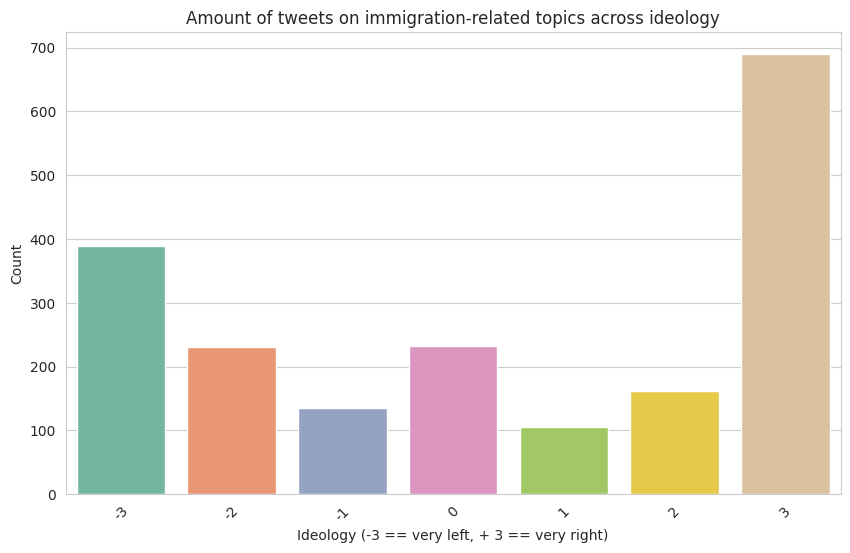

In [395]:
# Set the style
sns.set_style("whitegrid")

# Plot the count of each ideology
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Ideology', palette='Set2')
plt.title('Amount of tweets on immigration-related topics across ideology')
plt.xlabel('Ideology (-3 == very left, + 3 == very right)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

/tmp/ipykernel_4096860/1169338068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='normalized_party', palette='Set2')


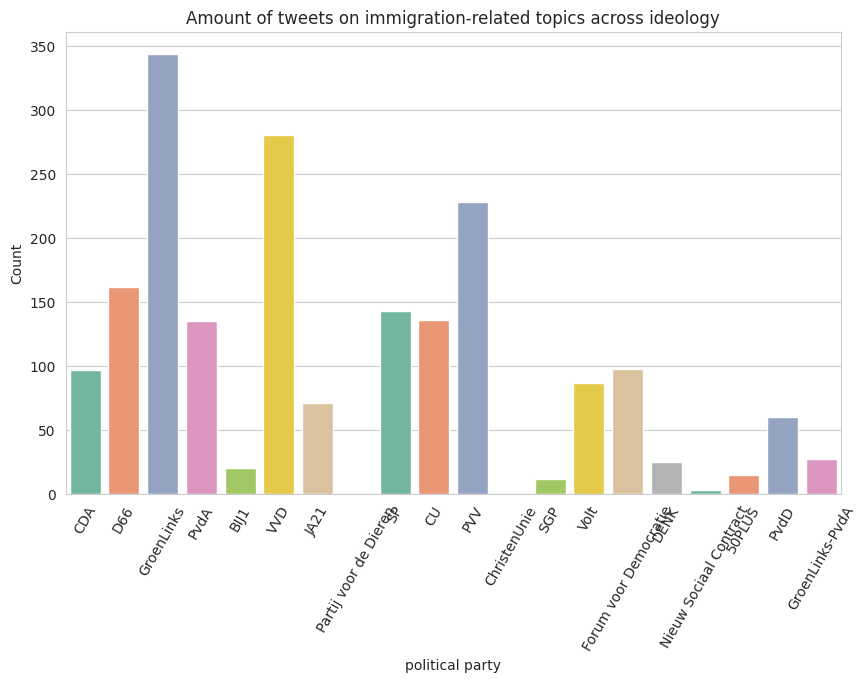

In [396]:
# Set the style
sns.set_style("whitegrid")

# Plot the count of each ideology
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='normalized_party', palette='Set2')
plt.title('Amount of tweets on immigration-related topics across ideology')
plt.xlabel('political party')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
## Create stratefied sample. 

# Step 1: stratefied sample of the immigration-specific tweets

In [397]:
print('distribution before stratefied sampling:')
print(filtered_df['Ideology_Group'].value_counts() )

# Calculate the number of samples to take from each group
num_samples_per_group = min(filtered_df['Ideology_Group'].value_counts())

# Define a function to sample each group
def stratified_sample(group):
    return group.sample(num_samples_per_group)

# Apply the stratified sampling function to each group
stratified_samples = filtered_df.groupby('Ideology_Group', group_keys=False).apply(stratified_sample)

# Reset the index of the sampled DataFrame
stratified_samples.reset_index(drop=True, inplace=True)

print('distribution AFTER stratefied sampling:')
stratified_samples['Ideology_Group'].value_counts()

distribution before stratefied sampling:
Right     690
Center    636
Left      620
Name: Ideology_Group, dtype: int64
distribution AFTER stratefied sampling:


Center    620
Left      620
Right     620
Name: Ideology_Group, dtype: int64

In [398]:
stratified_samples['immigration'] = 'yes'
stratified_samples.to_csv('immigratie_tweets_stratefied.csv')
len(stratified_samples)

1860

In [337]:
## step 2: stratefied sample of the NOT immigration-specific tweets
## here i need 1470 samples in total, to make up for 3330 tweets when combining both datasets. 

In [400]:
# Step 1: Identify tweet IDs in stratified_samples
excluded_tweet_ids = stratified_samples['tweet_id']

# Step 2: Filter df to exclude tweets with the identified tweet IDs
filtered_df2 = df[~df['tweet_id'].isin(excluded_tweet_ids)]

total_samples = 1470

# Calculate the number of samples to take from each group
num_groups = len(filtered_df2['Ideology_Group'].unique())
num_samples_per_group = total_samples // num_groups
remaining_samples = total_samples % num_groups

# Define a function to sample each group
def stratified_sample(group):
    global remaining_samples
    # Calculate the number of samples to take from this group
    num_samples = num_samples_per_group + int(remaining_samples > 0)
    remaining_samples = max(0, remaining_samples - 1)
    return group.sample(num_samples)

# Apply the stratified sampling function to each group
stratified_samples2 = filtered_df2.groupby('Ideology_Group', group_keys=False).apply(stratified_sample)

# Reset the index of the sampled DataFrame
stratified_samples2.reset_index(drop=True, inplace=True)

len(stratified_samples2)


1470

In [401]:
stratified_samples2['Ideology_Group'].value_counts()
stratified_samples2['immigration'] = 'no'
stratified_samples2.to_csv('non_immigratie_tweets_stratefied.csv')

In [406]:
## Combine
combined_samples = pd.concat([stratified_samples, stratified_samples2], ignore_index=True)
## Shuffle order
combined_samples = combined_samples.sample(frac=1).reset_index(drop=True)


combined_samples.to_csv('final_stratified_immigration_non_immigration.csv')
len(combined_samples)

3330

In [411]:
combined_samples[combined_samples['twitter_username'].isna()]

,Unnamed: 0_x,tweet_id,timestamp,text,full_text,hashtags,urls,source,Author,is_duplicated,...,period,Location,Age,Seniority,Image_URL,Political_Party,normalized_party,Ideology,Ideology_Group,immigration


/tmp/ipykernel_4096860/2215571245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_samples, x='normalized_party', palette='Set2')


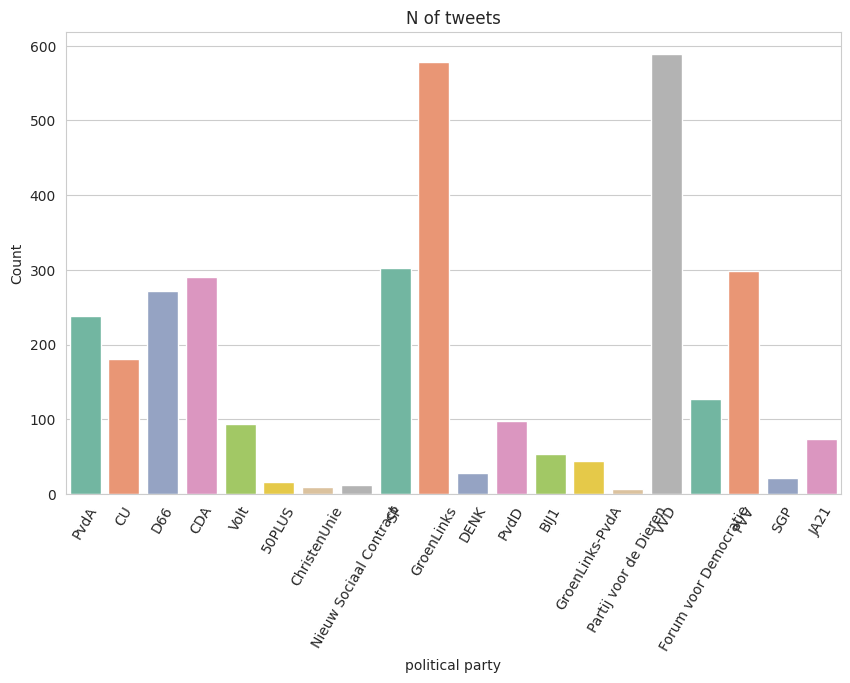

In [404]:
# Set the style
sns.set_style("whitegrid")

# Plot the count of each ideology
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_samples, x='normalized_party', palette='Set2')
plt.title('N of tweets')
plt.xlabel('political party')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.show()


/tmp/ipykernel_4096860/1456285453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_samples, x='Ideology_Group', palette='Set2')


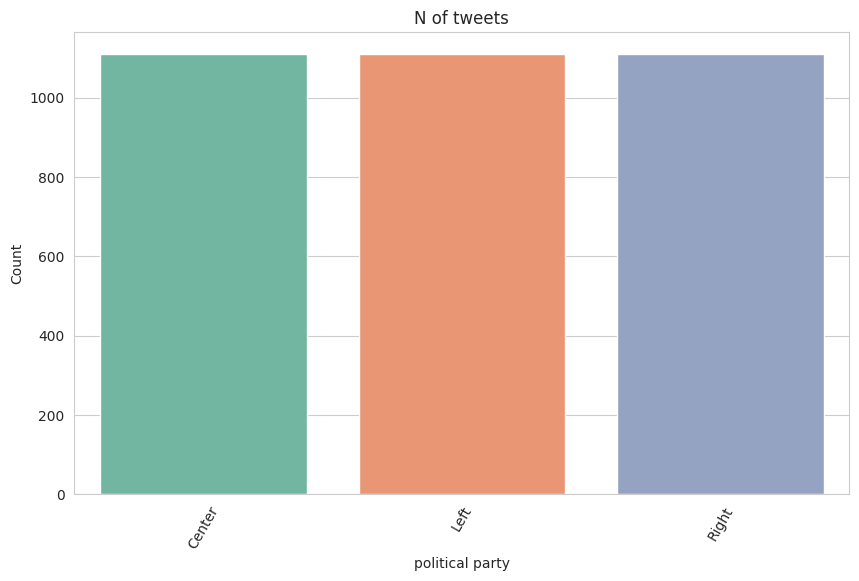

In [405]:
# Set the style
sns.set_style("whitegrid")

# Plot the count of each ideology
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_samples, x='Ideology_Group', palette='Set2')
plt.title('N of tweets')
plt.xlabel('political party')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('final_stratified_immigration_non_immigration.csv')
df['timestamp']

immigration_tweets = df[df['immigration'] == 'yes']
for i in immigration_tweets['text'][:100]:
    print(i)
    print()

In [20]:
immigration_tweets.to_csv('final_stratified_immigration.csv')